In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [49]:
df = pd.read_csv(r"/home/harty/insurancecharges/data/insurance.csv")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [52]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


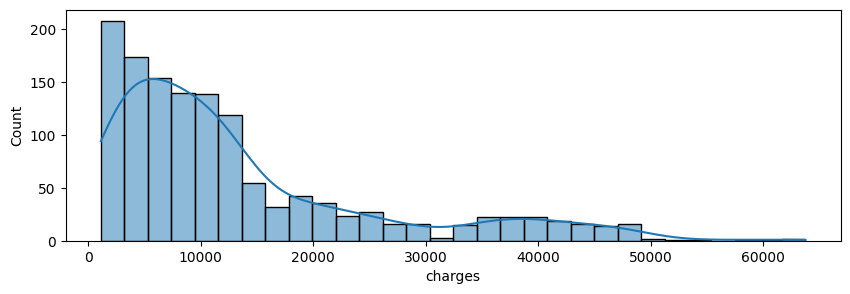

In [53]:
plt.figure(figsize=(10,3))
sns.histplot(data=df, x='charges', kde=True)
plt.show()

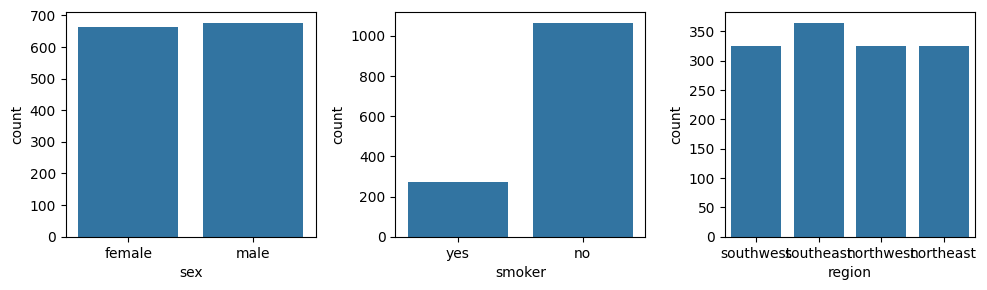

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (10,3))
sns.countplot(data=df, x='sex', ax=axes[0])
sns.countplot(data=df, x='smoker', ax=axes[1])
sns.countplot(data=df, x='region', ax=axes[2])
plt.tight_layout()
plt.show()

<Axes: ylabel='charges'>

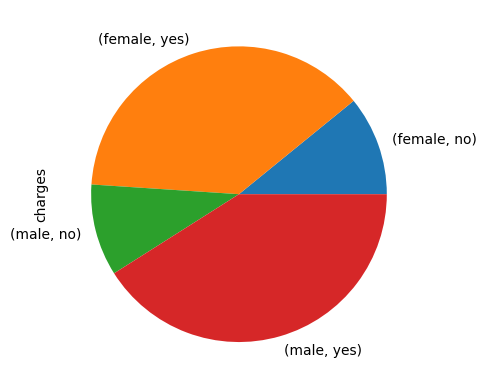

In [55]:
df.groupby(['sex','smoker'])['charges'].mean().plot(kind='pie')

<Axes: xlabel='age', ylabel='Count'>

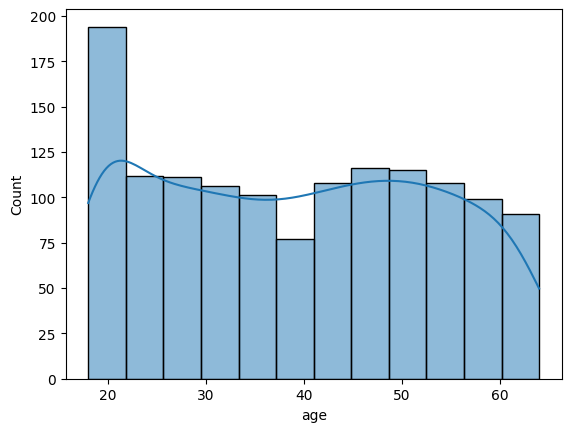

In [56]:
sns.histplot(data=df, x="age", kde=True)

<Axes: >

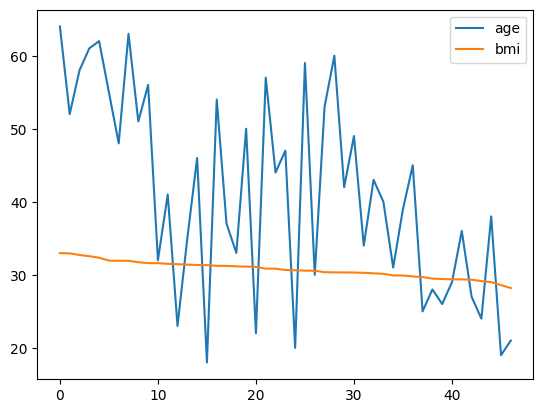

In [57]:
df.groupby(['age'])['bmi'].mean().sort_values(ascending=False).reset_index().plot(kind='line')

In [58]:
df.groupby(['age','bmi'])['charges'].mean().sort_values(ascending=False).reset_index().head(10)

,age,bmi,charges
0,54,47.410,63770.42801
1,45,30.360,62592.87309
2,52,34.485,60021.39897
3,31,38.095,58571.07448
4,33,35.530,55135.40209
5,60,32.800,52590.82939
6,28,36.400,51194.55914
7,64,36.960,49577.66240
8,59,41.140,48970.24760
9,63,37.700,48824.45000


In [59]:
df.groupby(['sex'])['bmi'].mean().sort_values(ascending=False).reset_index()

,sex,bmi
0,male,30.943129
1,female,30.377749


In [60]:
df.groupby(['sex'])['children'].mean().sort_values(ascending=False)

sex
male      1.115385
female    1.074018
Name: children, dtype: float64

In [61]:
df_enco = df.copy()
df_enco['sex'] = df_enco['sex'].map({'male':1,'female':0})
df_enco

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [62]:
df_enco['smoker'] = df_enco['smoker'].map({'yes':1,'no':0})
df_enco

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500
